In [1]:
%matplotlib inline

In [80]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.metrics import mean_squared_error

# 02. Linear and Logistic Regression
### Simple, yet powerful predictors
* Regression – problem statement and motivation;
* Ordinary least squares: method, simulated example, implementation on real data;
* RANSAC – robust regression model;
* Linear regression extensions: polynomial regression, multi-dimensional linear regression;
* Classification – problem statement and motivation;
* Logistic regression: method, simulated example, real data;
* Regularization for regression and classification.

In [3]:
print('Kernel is working..')

Kernel is working..


Logistic regression has "Regression" in it's name, but it does a classification. :D

### Linear Regression
Predict continuous values... and torture first-semester students

* Regression - predicting continuous variable
* Problem statement 
    * Given pairs of $ (x; y) $ points, create a model
        * Input $ x $, output $ y $; **goal: predict $ y $ given $ x $**
         * Under the assumption that $ y $ depends linearly on $ x $ (and nothing else)
* Modelling function
    * $\tilde{y} = ax + b$
    * Many samples: for each sample $ (x_{1}, y_{1}), ..., (x_{n}, y_{n}):$
        * $ \tilde{y_{i}} = ax_{i} + b, i \in [1;n] $
    * Many variables: $ \tilde{y} = a_{1}x_{1} + a_{2}x_{2} + ... + a_{n}x_{n} + b \equiv a^{T}X + b $
        * Trick: $ a_{0} \equiv b; x_{0} \equiv 1 \Rightarrow \tilde{y} = a_{0}.1 + a_{1}x_{1} + ... + a_{n}x_{n} = a^{T}x $ 

Imagine that we have a matrix. One row is one observation, and one column is a feature (or attribute), so one cell is a variable for an observation. (Assume that the matrix is made out of numbers only). This matrix is what we call the `features`, and we use a `X` sighn for it. Sometimes the underlines show the rank. If there is one line bellow, it's a vector, and if there are two - it's a matrix. By a convention we would say, that the dimensions are n rows by m cols. For a result we would expect a vector `y` containing n rows by 1 col. So we say that we have a process, such as when we give it the data from `X` it producess the results of `y`.

$$
X_{n,m} = 
\begin{pmatrix}
a_{1,1} & a_{1,2} & \cdots & a_{1,m} \\
a_{2,1} & a_{2,2} & \cdots & a_{2,m} \\
\vdots  & \vdots  & \ddots & \vdots  \\
a_{n,1} & a_{n,2} & \cdots & a_{n,m} 
\end{pmatrix} 
\Rightarrow f(a_{n}) \Rightarrow
y_{1,n} = \begin{bmatrix}
a_{1} \\ a_{2} \\ \vdots \\ a_{n} \end{bmatrix} $$

No system can say for itself whether it is correct or not, someone from outside has to check it.

Looking at the image above, we could see that we have a function $ f(a_{n})$ , well this is basically our model :D This function gives us a result, which we call `prediction`, $ \tilde{y} $ 

Our job is to make $ \tilde{y} $ as similar as possible to $ y $ (approximate it).

It's good to be able to think about data as points in n-dimentional space.

To measure two points we could use Euclidian distance: $ d(p,q)^{2} = (q_{1} - p_{1})^{2} + (q_{2} - p_{2})^{2} $ or $ d(p,q) = \sqrt{(q_{1} - p_{1})^{2} + (q_{2} - p_{2})^{2}} $ 

These "points" could tell us how similar are two data observations. But look, there is a difference between $ y_{i} $ and the predicted $ \tilde{y_{i}} $, so we just subtract them - $ y_{i} - \tilde{y_{i}}$. Here comes the next question, the result could be negative, that's why we could get the mode $ | y_{i} - \tilde{y_{i}} |$  or get them as a square root $ (y_{i} - \tilde{y_{i}})^{2} $. Now that becomes the difference of "how much is one point far away from the predicted one".

$$ d_{i} = (y_{i} - \tilde{y_{i}})^{2} $$

But we do not care for only one observation, we are interested in all of them, so that's why we can get the sum of all of them, and after that divide it to the mean. It's also called Mean Square Error (MSE) or cost function. We usually use `J` for the MSE.
$$ J := \frac{1}{n} \sum^{n - 1}_{i = 0} d_{i} \equiv \frac{1}{n} \sum_{i} (y_{i} - \tilde{y_{i}})^{2} $$

Now we have a new goal: find "the best model", $ f(a_{n}) $. So let's define what is the best model: well, basically $ min(J) $. And suddenly we have a optimization task :D

### Gradient Descent
* Input: $ a, b $; output $ J $
* Paraboloid (3D parabola)
    * It has exactly one min value
        * And we can see it
* Intuition
    * If the plot was a real object (say, a sheet of some sort), we could slide a ball bearing on it
    * After a while, the ball bearing will settle at the "bottom" due to gravity
    * We can "simulate" this: **gradient descent**
* Reminder: gradient
    * "Multi-dimensional derivative"

$$ \nabla J = 
\begin{pmatrix} 
\frac{\partial J}{\partial a} \\
\frac{\partial J}{\partial b} 
\end{pmatrix} $$

<img src="pics/gradient-descent.png" />

* Iterative algorithm - perform as many times as needed
    * Start from some sort of point in the $ (a; b) $ space: $ (a_{0};b_{0}) $
    * Decide how big steps to take: number $ a $
        * Called **learning rate** in ML terminology
    * Use the current $ a, b $ and $ x, y $ to compute $ \nabla J $
        * $ - \nabla J_{a} $ tells us how much to move in the $ a $ direction in order to get to the minimum
        * Similar for $ - \nabla J_{b} $
    * Take a step with size $ a $ in each direction
        * $ a_{1} = a_{0} - \alpha \nabla J_{a}; b_{1} = b_{0} - \alpha \nabla J_{b}$
        * $ (a_{1}; b_{1}) $  are the new coordinates
    * Repeat the two preceding steps as needed
        * Usually, we do this for a fixed number of iterations

Imagine that you are in a mountain. You see nothing beside your feet, and your task is to get to the bottom of the mountain. $ \nabla J $ is the function, that describes the gradient of the mountain. ($a_{0}; b_{0})$ are our starting coordinates. We know how much is the gradient - $ \nabla J $, so we just go in the reverse direction of it to make a step down. $ \alpha $ describes our step size. Imagine, that the same way we could be making such a small steps, that we cannot get to the bottom of the mounain by the end of the iterations, the same way we could start going up on the next hill, because our steps are way too big. We call $ \alpha $ either **"step size"** or **"learning rate"**

Well, there is a chance, that we could hit a local minimum, which is higher than the largest minimum. We shouldn't worry about that yet.

So with that said, we do not care about the minimal loss function, but the arguments, that make the minimal loss function.

Getting gradient ascent is as easy: $ a_{1} = a_{0} + \alpha \nabla J_{a} $ 

In [7]:
housing_data = pd.read_fwf("https://raw.githubusercontent.com/rupakc/UCI-Data-Analysis/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.data", header = None)

In [8]:
housing_data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [9]:
housing_data.dtypes

0     float64
1     float64
2     float64
3       int64
4     float64
5     float64
6     float64
7     float64
8       int64
9     float64
10    float64
11    float64
12    float64
13    float64
dtype: object

In [12]:
# Mean prices for the houses in K's
target = housing_data[13] # y

In [13]:
attributes = housing_data.drop(columns=[13]) # X

In [15]:
linear_regression = LinearRegression()

In [16]:
# Fit the data into the model
linear_regression.fit(attributes, target)

LinearRegression()

In [17]:
# Get the score of the model
linear_regression.score(attributes, target)

0.7198065414937174

In [20]:
predictions = linear_regression.predict(attributes)

In [21]:
mean_squared_error(target, predictions)

23.653807404961373

In [22]:
predictions - target

0      6.109473
1      3.528110
2     -3.692144
3     -4.354644
4     -7.716318
         ...   
501    0.908460
502    1.256091
503    3.617364
504    4.026543
505    9.975852
Name: 13, Length: 506, dtype: float64

In [26]:
# The formula from above
((predictions - target) ** 2).sum() / len(target)

23.653807404961373

In [27]:
np.sqrt(((predictions - target) ** 2).sum() / len(target))

4.86351800705635

This is one pretty goot grade for our model. It makes errors with up to $4.863K.

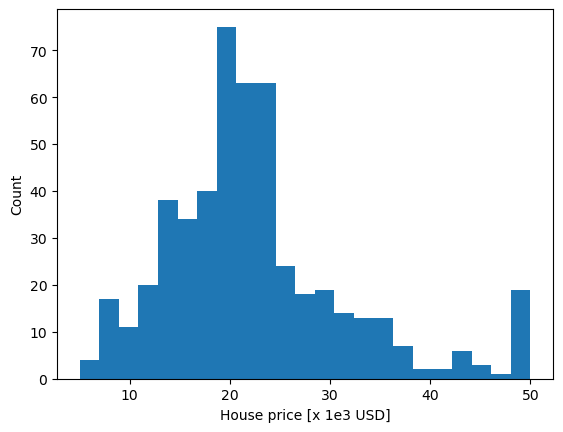

In [31]:
plt.hist(target, bins = "fd")

plt.xlabel("House price [x 1e3 USD]")
plt.ylabel("Count")

plt.show()

In [30]:
target.mean()

22.532806324110677

As we can see, though, there are some houses, that cost \\$5-10K, which is near our MSE. That's pretty bad. We don't want our model to say, that a house for $4.3K costs somewhere around \\$0-10K. 

In [33]:
# Let's try getting the difference from the original value
(np.abs(target - predictions) / target).mean() * 100

17.15737312486942

So these \\$5K are near 17%

We could check out different parts of our dataset. Like, whats the error for houses between 20 and 25K, for example.

In [34]:
targets_it_10k = target[target <= 10]

In [35]:
attributes_lt_10k = housing_data.loc[targets_it_10k.index].drop(columns = 13)

In [36]:
predictions_lt_10k = linear_regression.predict(attributes_lt_10k)

In [37]:
(np.abs(targets_it_10k - predictions_lt_10k) / targets_it_10k).mean() * 100

59.878738312612924

So as we expected, "in small prices we make big mistakes" - I am not talking about models, btw

In [38]:
linear_regression.coef_

array([ 2.09281375e-01,  1.49403979e-02,  1.27164577e-02,  3.00565375e+00,
       -1.55234852e+01,  4.29955958e+00,  2.84848139e-03, -1.08366345e+00,
        1.93258621e-01, -2.42034372e-03, -9.65535221e-01,  9.43510233e-03,
       -5.25242783e-01])

In [40]:
# Свободен член (каква щеше да е стойността, ако всички други променливи бяха равни на 0)
linear_regression.intercept_

28.30511075009914

Each coeficient means how steep is one line, and it depends on $ ax $

In [41]:
housing_data.describe().T

,count,mean,std,min,25%,50%,75%,max
0,506.0,1.716290,2.653510,0.00632,0.0819,0.250895,2.326717,9.96654
1,506.0,11.363636,23.322453,0.00000,0.0000,0.000000,12.500000,100.00000
2,506.0,11.136779,6.860353,0.46000,5.1900,9.690000,18.100000,27.74000
3,506.0,0.069170,0.253994,0.00000,0.0000,0.000000,0.000000,1.00000
4,506.0,0.554695,0.115878,0.38500,0.4490,0.538000,0.624000,0.87100
5,506.0,6.284634,0.702617,3.56100,5.8855,6.208500,6.623500,8.78000
6,506.0,68.574901,28.148861,2.90000,45.0250,77.500000,94.075000,100.00000
7,506.0,3.696228,1.999689,0.58570,2.0737,3.107300,5.112625,9.22290
8,506.0,4.332016,1.417166,1.00000,4.0000,4.000000,5.000000,8.00000
9,506.0,408.237154,168.537116,187.00000,279.0000,330.000000,666.000000,711.00000


Yes, but if you look at the matrix here, we could see, that we need to scale our data, so we could see how they depend. We could scale the data using the `MinMaxScaler` from sklearn.

In [46]:
scaler = MinMaxScaler()

In [47]:
scaler.fit(attributes)

MinMaxScaler()

In [48]:
scaler.data_min_

array([6.320e-03, 0.000e+00, 4.600e-01, 0.000e+00, 3.850e-01, 3.561e+00,
       2.900e+00, 5.857e-01, 1.000e+00, 1.870e+02, 1.260e+01, 3.200e-01,
       1.730e+00])

In [49]:
scaler.data_range_

array([9.96022e+00, 1.00000e+02, 2.72800e+01, 1.00000e+00, 4.86000e-01,
       5.21900e+00, 9.71000e+01, 8.63720e+00, 7.00000e+00, 5.24000e+02,
       9.40000e+00, 3.96580e+02, 3.62400e+01])

In [52]:
# As we can see now, the minimum for each column is 0
scaler.transform(attributes).min(axis = 0)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [55]:
# And the max is 1
scaler.transform(attributes).max(axis = 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [56]:
attributes = scaler.fit(attributes)

In [58]:
linear_regression_with_scaler = LinearRegression()

In [62]:
# You could intercept the coeficients using the new linear regression
#linear_regression_with_scaler.fit(target, attributes)

### How do we work with outliers (out, liers!)

Outliers - anomalies, errors

There are a lot of ways of dealing with outliers, one very common of which is RANSAC (RANdom SAmple Consensus) 
1. Fit the model to a random subsample("inliers")
2. Test all data points and include those which are "near" the model
    * Small enough error, tolerance provided by developer
3. Fit the model again
4. Estimate the error of the model (difference between first and second)
5. Iterate steps 1-4 until performance reaches a threshold number of iterations

Rowbust ML - Machine Learning, that is unsensitive to outliers

Good thing is, that it's also implemented and ready for us to use ;d

In [64]:
ransac = RANSACRegressor()

In [66]:
attributes = housing_data.drop(columns=[13]) # X

In [67]:
ransac.fit(attributes, target)

RANSACRegressor()

In [68]:
ransac.inlier_mask_

array([ True,  True, False, False, False, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True, False, False,  True,
        True, False,  True, False,  True,  True,  True,  True, False,
        True,  True,

In [69]:
ransac.inlier_mask_.sum() / len(target)

0.5731225296442688

In [70]:
(np.abs(target - ransac.predict(attributes)) / target).mean() * 100

28.112320040712635

D: lol

In [73]:
inliers = attributes[ransac.inlier_mask_]

In [77]:
inlier_targets = target[ransac.inlier_mask_]

In [76]:
ransac.predict(inliers)

array([25.89644239, 21.01616743, 20.50194198, 15.33210151, 17.98855403,
       19.86479546, 18.13980562, 22.72589902, 18.01392057, 18.08627189,
       18.03451278, 20.88122484, 17.54540791, 17.13522491, 13.77960943,
       16.5559983 , 17.03506528, 14.43114789, 15.57137432, 15.68752541,
       19.46099745, 21.55082581, 15.64286533, 16.0196266 , 15.81570279,
       20.84129767, 21.75197631, 21.99126654, 24.00875834, 28.03911914,
       31.39267801, 25.47784288, 25.31491533, 21.66017194, 19.9241728 ,
       20.85433306, 17.39231155, 12.35070634, 15.85802952, 20.0602964 ,
       19.44467072, 25.64312941, 22.27913698, 18.35837367, 21.36538549,
       19.16193005, 16.01179048, 16.33985033, 20.39668654, 24.02637286,
       25.9405285 , 21.55286976, 21.10496696, 17.85019979, 19.97957779,
       23.33211083, 24.16933354, 24.00129245, 22.35173686, 23.31949039,
       22.31939207, 21.39248946, 27.07008224, 23.08720926, 24.36792255,
       22.44339954, 24.11696862, 25.46168751, 22.44702534, 22.67

In [78]:
(np.abs(inlier_targets - ransac.predict(inliers)) / inlier_targets).mean() * 100

7.117635814448603

Better model, but less data ^

We could create new features using polynomials

In [81]:
poly = PolynomialFeatures()

In [82]:
poly.fit(attributes)

PolynomialFeatures()

In [84]:
poly.transform(attributes).shape

(506, 105)

In [85]:
attributes.shape

(506, 13)

In [86]:
attributes_quadratic = poly.transform(attributes)

In [87]:
attributes_quadratic

array([[1.00000000e+00, 6.32000000e-03, 1.80000000e+01, ...,
        1.57529610e+05, 1.97656200e+03, 2.48004000e+01],
       [1.00000000e+00, 2.73100000e-02, 0.00000000e+00, ...,
        1.57529610e+05, 3.62766600e+03, 8.35396000e+01],
       [1.00000000e+00, 2.72900000e-02, 0.00000000e+00, ...,
        1.54315409e+05, 1.58310490e+03, 1.62409000e+01],
       ...,
       [1.00000000e+00, 6.07600000e-02, 0.00000000e+00, ...,
        1.57529610e+05, 2.23851600e+03, 3.18096000e+01],
       [1.00000000e+00, 1.09590000e-01, 0.00000000e+00, ...,
        1.54802902e+05, 2.54955600e+03, 4.19904000e+01],
       [1.00000000e+00, 4.74100000e-02, 0.00000000e+00, ...,
        1.57529610e+05, 3.12757200e+03, 6.20944000e+01]])

In [88]:
linear_regression.fit(attributes_quadratic, target)

LinearRegression()

In [89]:
predictions = linear_regression.predict(attributes_quadratic)

In [90]:
(np.abs(target - predictions) / target).mean() * 100

12.494863079869404

In [91]:
linear_regression.coef_

array([ 1.26644961e+09, -7.21090869e+00, -1.03135657e+00, -4.75533941e+00,
        2.98875593e+01,  4.23817312e+01,  1.13659546e+01,  8.67213370e-01,
       -2.62157127e+00, -1.38279509e+00, -1.13741180e-01, -3.10131929e+00,
       -5.29020693e-02, -2.35554353e-01, -9.69692295e-02,  5.86938098e-01,
        4.15093369e-01,  2.29791165e+00, -1.63608448e+00, -6.44299486e-01,
        2.57320357e-02, -6.61480406e-01,  8.24239101e-01, -3.95635290e-03,
        4.08158680e-01, -1.62124950e-03, -1.71696311e-01,  8.23328263e-05,
        4.89690722e-03, -1.56548999e-01,  2.04304825e-01,  6.09795944e-02,
       -1.05887691e-03,  1.80827335e-02, -4.74182120e-03,  1.02176456e-04,
       -1.10298056e-03,  1.07903017e-03,  2.70280996e-04,  3.00346724e-02,
        5.55953688e-02,  3.42726632e+00,  1.00531970e-01,  2.66928864e-04,
        1.74269524e-02,  5.36353823e-02,  1.74517646e-04, -6.34007792e-02,
        7.15862281e-03, -3.73316961e-02,  2.98875591e+01, -2.51370629e+01,
       -5.99777814e+00, -

In [92]:
list(zip(poly.get_feature_names_out()[1:], linear_regression.coef_))

[('x0', 1266449610.0952754),
 ('x1', -7.210908687329424),
 ('x2', -1.0313565681949037),
 ('x3', -4.7553394084514755),
 ('x4', 29.887559335035835),
 ('x5', 42.38173122177334),
 ('x6', 11.365954564569499),
 ('x7', 0.8672133702321384),
 ('x8', -2.621571268455653),
 ('x9', -1.3827950877805917),
 ('x10', -0.11374118012951513),
 ('x11', -3.101319294351478),
 ('x12', -0.05290206925751347),
 ('x0^2', -0.23555435306959982),
 ('x0 x1', -0.09696922947158884),
 ('x0 x2', 0.5869380977880241),
 ('x0 x3', 0.4150933688419504),
 ('x0 x4', 2.2979116489538502),
 ('x0 x5', -1.6360844788374218),
 ('x0 x6', -0.6442994858575187),
 ('x0 x7', 0.02573203565786747),
 ('x0 x8', -0.6614804057523123),
 ('x0 x9', 0.8242391007752112),
 ('x0 x10', -0.003956352903030869),
 ('x0 x11', 0.4081586797068784),
 ('x0 x12', -0.0016212494972678293),
 ('x1^2', -0.171696310908632),
 ('x1 x2', 8.233282632197358e-05),
 ('x1 x3', 0.004896907224098551),
 ('x1 x4', -0.15654899882106188),
 ('x1 x5', 0.20430482516725484),
 ('x1 x6', 0.0

### Logistic Regression - It makes classification
* Classification algorithm (despite its name)
* Two classes: negative (0) and positive (1)
    * Can be extended to more classes
* How does it work?
    * Linear regression can give us all kinds of values
    * We want to constrain them between 0 and 1
    * Approach
        * Perform linear regression: $ \tilde{y} = X_{a} $
        * Use the sigmoid function to constran the output $ \sigma(\tilde{y}) = \frac{1}{1 + e^{-\tilde{y}}} = \frac{1}{1 + e^{-X_{a}}} $
        * Quantization: if $ \sigma \geq 0.5 $ return 1, and 0 otherwise
            * Remember that we only need to return 0 or 1
            * We can also use the raw values as probability measures

<img src="pics/lr.png" />

Date: 14.09.2023